##**IMPORT REQUIRED LIBRARIES**##


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from math import sin, cos, sqrt, atan2, radians

**IMPORT CSV FILE**

In [3]:
df=pd.read_csv('C:\\Users\\Wasi\\Desktop\\jupiter note book\\.ipynb_checkpoints\\uber1.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.shape

(200000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967153,40.767158,-73.963659,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [4]:

def haversine_distance(row):
    R = 6371.0 
    lat1 = radians(row['pickup_latitude'])
    lon1 = radians(row['pickup_longitude'])
    lat2 = radians(row['dropoff_latitude'])
    lon2 = radians(row['dropoff_longitude'])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance
df['distance'] = df.apply(haversine_distance, axis=1)
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,24238194,52:06.0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,04:56.0,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,45:00.0,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,22:21.0,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,47:00.0,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...,...,...
199995,42598914,49:00.0,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,16382965,09:00.0,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,27804658,42:00.0,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,20259894,56:25.0,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695416,1,3.539715


D:\Wasi\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


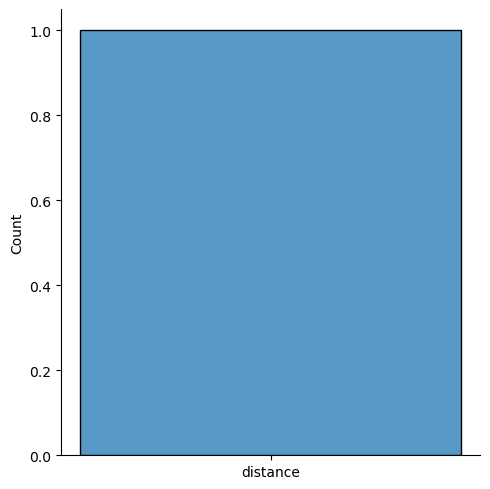

In [26]:
sns.displot(['distance'])

In [5]:
df=df.dropna()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199999 non-null  int64  
 1   key                199999 non-null  object 
 2   fare_amount        199999 non-null  float64
 3   pickup_datetime    199999 non-null  object 
 4   pickup_longitude   199999 non-null  float64
 5   pickup_latitude    199999 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    199999 non-null  int64  
 9   distance           199999 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 16.8+ MB


In [6]:
cols=['Unnamed: 0']
df=df.drop(cols, axis=1)

In [7]:
col=['key']
df=df.drop(col,axis=1)

In [8]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [9]:
df.count()

fare_amount          199999
pickup_datetime      199999
pickup_longitude     199999
pickup_latitude      199999
dropoff_longitude    199999
dropoff_latitude     199999
passenger_count      199999
distance             199999
dtype: int64

In [10]:
col=['pickup_datetime','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']
df=df.drop(col,axis=1)

In [11]:
df.head()

,fare_amount,passenger_count,distance
0,7.5,1,1.683323
1,7.7,1,2.457590
2,12.9,1,5.036377
3,5.3,3,1.661683
4,16.0,5,4.475450


In [12]:
df

,fare_amount,passenger_count,distance
0,7.5,1,1.683323
1,7.7,1,2.457590
2,12.9,1,5.036377
3,5.3,3,1.661683
4,16.0,5,4.475450
...,...,...,...
199995,3.0,1,0.112210
199996,7.5,1,1.875050
199997,30.9,2,12.850319
199998,14.5,1,3.539715


In [14]:
x = df[['distance', 'passenger_count']]
y = df['fare_amount']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)
model=RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.6203773836287713

In [15]:
model.score(x_train,y_train)

0.9017516036827329

In [16]:
y_preds=model.predict(x_test)
y_preds

array([ 9.293 , 33.7391, 15.808 , ..., 14.96  ,  6.72  ,  7.755 ])

C:\Program Files\KMSpico\temp\ipykernel_5352\4141223472.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[target_column])


<Axes: xlabel='fare_amount', ylabel='Density'>

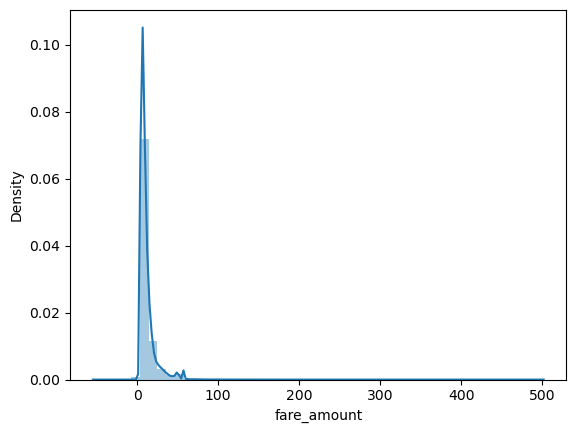

In [84]:
sns.distplot(df[target_column])

In [18]:
bool_df=df.isnull()
bool_df

,fare_amount,passenger_count,distance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
199995,False,False,False
199996,False,False,False
199997,False,False,False
199998,False,False,False


<Axes: >

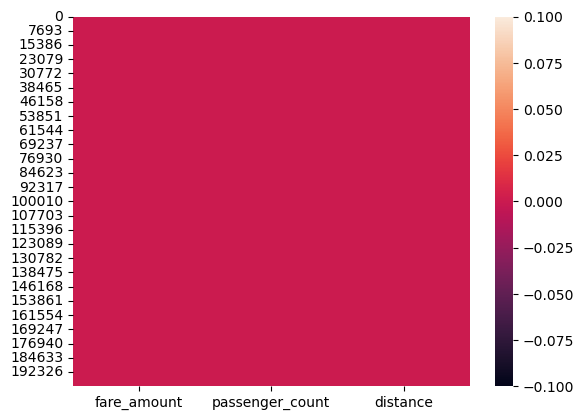

In [25]:
sns.heatmap(bool_df)

D:\Wasi\anaconda\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Wasi\anaconda\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Axes: >

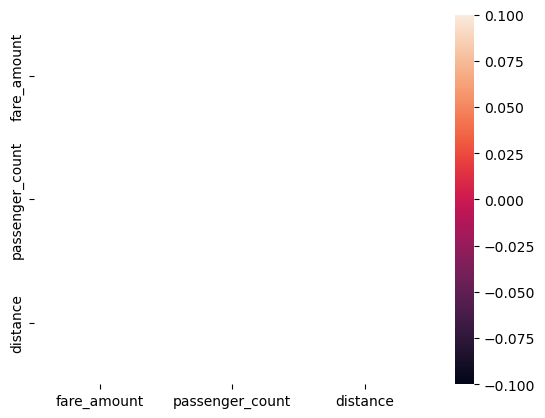

In [27]:
sns.heatmap(bool_df.corr())

In [19]:
corr = df.corr()
corr_df=pd.DataFrame(corr)
corr

,fare_amount,passenger_count,distance
fare_amount,1.000000,0.010158,0.024684
passenger_count,0.010158,1.000000,-0.001472
distance,0.024684,-0.001472,1.000000


<Axes: >

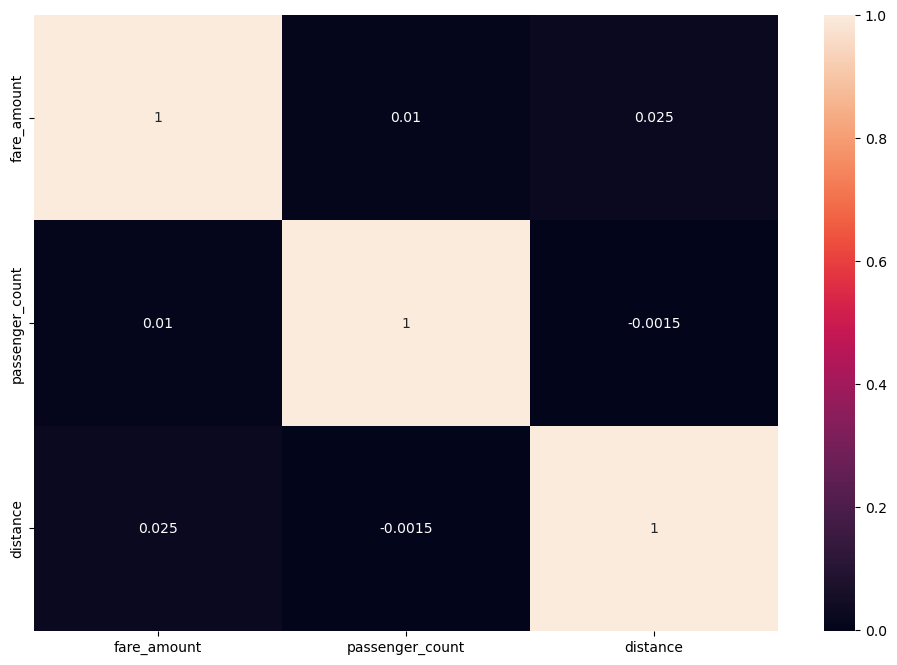

In [20]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [21]:
model.score(x_train,y_train)

0.9017516036827329

In [22]:
y_train

135676     6.9
6609       4.9
171363     4.5
92556      4.1
34037     11.5
          ... 
53491     16.9
106818     8.5
61324      3.7
132004     7.3
34752     28.9
Name: fare_amount, Length: 159999, dtype: float64

In [23]:
y_test

707        7.7
24825     23.5
145087    12.9
92695      3.3
148175     8.5
          ... 
85805     10.0
59092      8.9
178667    19.5
55229      5.0
69567     17.5
Name: fare_amount, Length: 40000, dtype: float64

In [24]:
x_train

,distance,passenger_count
135676,3.315853,1
6609,0.826931,4
171363,1.371442,1
92556,1.263227,1
34037,1.294652,1
...,...,...
53491,8.350938,1
106818,1.490335,4
61324,1.061690,3
132004,0.981262,2


In [25]:
x_test

,distance,passenger_count
707,2.855326,1
24825,9.011171,4
145087,5.714565,1
92695,0.513808,1
148175,3.778953,1
...,...,...
85805,3.227575,2
59092,2.333789,6
178667,6.082080,1
55229,1.245239,1


In [27]:
comparison=pd.DataFrame({"Actual label":y_test,"Predicted label":y_preds})
comparison

,Actual label,Predicted label
707,7.7,9.2930
24825,23.5,33.7391
145087,12.9,15.8080
92695,3.3,6.1350
148175,8.5,11.8020
...,...,...
85805,10.0,11.4640
59092,8.9,8.9300
178667,19.5,14.9600
55229,5.0,6.7200


In [28]:
comparison.reset_index().drop(["index"],axis=1)

,Actual label,Predicted label
0,7.7,9.2930
1,23.5,33.7391
2,12.9,15.8080
3,3.3,6.1350
4,8.5,11.8020
...,...,...
39995,10.0,11.4640
39996,8.9,8.9300
39997,19.5,14.9600
39998,5.0,6.7200


In [29]:
comparison.to_csv('D:\Wasi\comparison2.csv')

In [31]:
r2_score(y_test,y_preds)


0.6203773836287713

In [32]:
Mse=mean_squared_error(y_test,y_preds)
Mse

39.30101884723225

In [33]:
RMSE=np.sqrt(Mse)
RMSE

6.26905246805546

In [35]:
df=pd.DataFrame(y_preds)
df

,0
0,9.2930
1,33.7391
2,15.8080
3,6.1350
4,11.8020
...,...
39995,11.4640
39996,8.9300
39997,14.9600
39998,6.7200


In [36]:
df.to_csv('D:\Wasi\predict2.csv')

In [37]:
df = pd.concat([x_train, y_train, x_test, y_test, comparison], axis=1)
df

,distance,passenger_count,fare_amount,distance,passenger_count,fare_amount,Actual label,Predicted label
135676,3.315853,1.0,6.9,NaN,NaN,NaN,NaN,NaN
6609,0.826931,4.0,4.9,NaN,NaN,NaN,NaN,NaN
171363,1.371442,1.0,4.5,NaN,NaN,NaN,NaN,NaN
92556,1.263227,1.0,4.1,NaN,NaN,NaN,NaN,NaN
34037,1.294652,1.0,11.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
85805,NaN,NaN,NaN,3.227575,2.0,10.0,10.0,11.464
59092,NaN,NaN,NaN,2.333789,6.0,8.9,8.9,8.930
178667,NaN,NaN,NaN,6.082080,1.0,19.5,19.5,14.960
55229,NaN,NaN,NaN,1.245239,1.0,5.0,5.0,6.720


In [38]:
df.reset_index().drop(["index"],axis=1)

,distance,passenger_count,fare_amount,distance,passenger_count,fare_amount,Actual label,Predicted label
0,3.315853,1.0,6.9,NaN,NaN,NaN,NaN,NaN
1,0.826931,4.0,4.9,NaN,NaN,NaN,NaN,NaN
2,1.371442,1.0,4.5,NaN,NaN,NaN,NaN,NaN
3,1.263227,1.0,4.1,NaN,NaN,NaN,NaN,NaN
4,1.294652,1.0,11.5,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
199994,NaN,NaN,NaN,3.227575,2.0,10.0,10.0,11.464
199995,NaN,NaN,NaN,2.333789,6.0,8.9,8.9,8.930
199996,NaN,NaN,NaN,6.082080,1.0,19.5,19.5,14.960
199997,NaN,NaN,NaN,1.245239,1.0,5.0,5.0,6.720


In [39]:
df.to_csv('D:\Wasi\Project2.csv')

In [40]:
user_distance = float(input("Enter the distance: "))
user_passenger_count = int(input("Enter the passenger count: "))
user_prediction = model.predict([[user_distance, user_passenger_count]])
print(f'Predicted Fare Amount: {user_prediction[0]}')


Enter the distance: 1.371442
Enter the passenger count: 1
Predicted Fare Amount: 4.724


D:\Wasi\anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
